
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each having a variance of 0.3. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.
2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Write a function called kNNClassify that accepts training data, a test point, and the hyperparameter 'k' as input and returns the label of the test point. Pick a reasonable 'k' for this experiment. Use "kNNClassify" function to generate the labels for the test data generated in part(a) of this PA. Compare the predicted labels with the original labels and calculate the portion of test data points that are correctly classified. In other words, calculate the accuracy of the classifier.
3. Create a visual representation of the predictions by plotting all data points in a 2D plane. Assign green and blue colors to represent class 1 and class 2, respectively. For test data points that are misclassified, assign the color red.
4. Generate and visualize the decision regions of 2D plane that are associated with each class, for a given classifier. Decision regions can be created by classifying all the data points in the 2D grid and assigning class-specific colors to them.

<b> Part(c): Parameter selection: What is good value for k? - </b> One intuitive approach to determine the optimal 'k' is through cross-validation. During cross-validation, a ρ% portion of the training dataset is utilized as the validation dataset, and the model's performance is assessed on this validation set with various 'k' values. Through these cross-validation experiments, we select the 'k' that yields the best performance on the validation data.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
if there is an improvement on the classification error over the result of Part 2.

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or adding noise by randomly flipping the labels on the training set.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> : This part will not be graded. However, you are recommended to work on it to get exposure to the practical applications of the KNN classifier.

1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector. NOTE: If you had already written a kNNClassify for multi class classification in part1 (b), you are free to use it.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%.
3. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
4. Apply these values to evaluate the performance on the test dataset.
5. Create a confusion matrix to understand the most confused classes (digits).
6. Suggest alternate ways to improve the performance.



In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

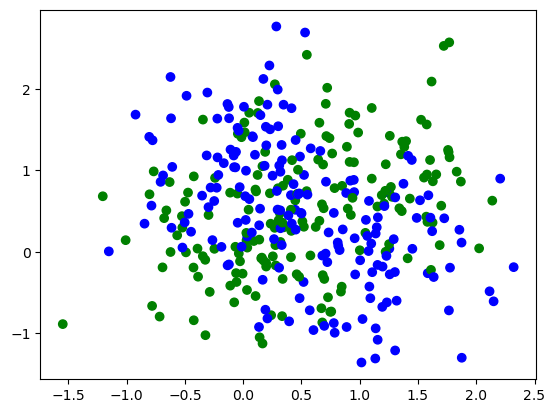

In [2]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1=np.array([0,0])
mean2=np.array([0,1])
mean3=np.array([1,0])
mean4=np.array([1,1])
cov=np.array([[0.3,0],[0,0.3]])

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution

points1 = np.random.multivariate_normal(mean1,cov,90)
points2 = np.random.multivariate_normal(mean2,cov,90)
points3 = np.random.multivariate_normal(mean3,cov,90)
points4 = np.random.multivariate_normal(mean4,cov,90)

# print(points1)
# print(points2)
# print(points3)
# print(points4)

train_a = points1[0:30] 
train_b = points2[0:30]
train_c = points3[0:30]
train_d = points4[0:30]

test_a = points1[30:] 
test_b = points2[30:] 
test_c = points3[30:] 
test_d = points4[30:] 

# print(test_a.size)
# print(train_b)
# print(train_c)
# print(train_d)

# Generate training data

x_train_1 = np.concatenate((train_a,train_d))
x_train_2 = np.concatenate((train_b,train_c))
y_train_1 = np.ones(60,)
y_list_2_train = [-1]*60 
y_train_2 = np.array(y_list_2_train)

x_train = np.concatenate((x_train_1,x_train_2))
y_train = np.concatenate((y_train_1,y_train_2))
# y_train_2
# train_2.size

# Generate testing data

x_test_1 = np.concatenate((test_a,test_d))
x_test_2 = np.concatenate((test_b,test_c))
y_test_1 = np.ones(120,)
y_list_2_test = [-1]*120 
y_test_2 = np.array(y_list_2_test)

x_test = np.concatenate((x_test_1,x_test_2))
y_test = np.concatenate((y_test_1,y_test_2))
# test_2.size



#Visualize the data using plt.scatter() function

c_train = ['green' if y == 1 else 'blue' for y in y_train]
c_test = ['green' if y == 1 else 'blue' for y in y_test]
plt.scatter(x_train[:,0], x_train[:,1], color =c_train)
plt.scatter(x_test[:,0], x_test[:,1], color =c_test)
plt.xlabel("x", fontsize = 12)
plt.ylabel("y", fontsize = 12)
plt.show()

## Observation and Inferences - part(a) 
1. The points, derived from the gaussian distribution, with mean (0,0),(1,0),(0,1),(1,1) and variance 0.3. 
2. Now since the points (0,0) and (1,1) are classified as class 1 (green color), there is an higher density of green points in the top right and bottom left. Similarly there are more density of blue points in the bottom right and top left corresponding to the points belonging to the gaussian distribution with mean (1,0) and (0,1)


0.675


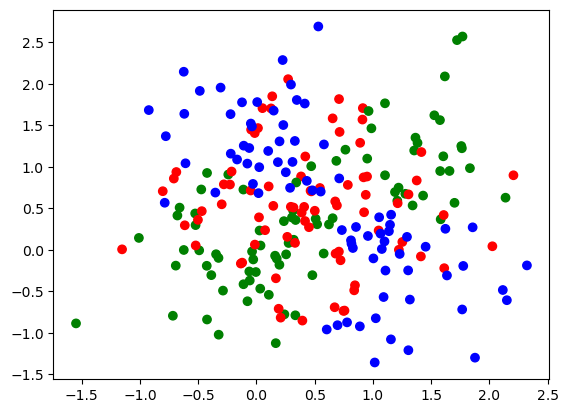

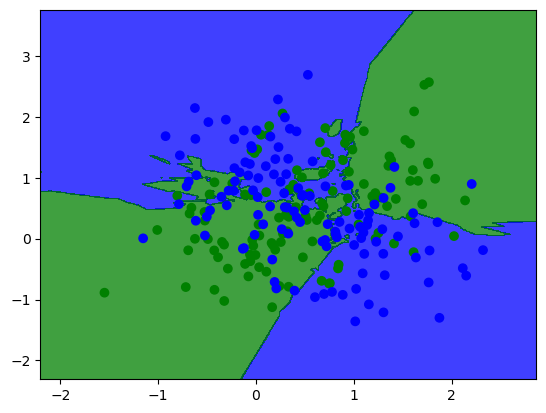

In [3]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
def kNNClassify(X_train,Y_train,X_test,k):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''
  #Algorithm
  #1.Initialize a list to store the predictions of our algorithm
  #2.Iterate through the test points
  #3.    Initialize a list to store the distances of test point with each of the training point.
  #4.    Iterate through the training points
  #5.        Compute the distance between the test and train point
  #6.    Find out the k nearest neighbours
  #7.    Get the most frequent label of k nearest neighbours
  #8.Return the predictions
  #Fill the code
#   pass
  predictions = []
  for x in X_test:
    distances = [np.sqrt(np.sum((x - x_tr)**2)) for x_tr in X_train]
#     print(len(distances))
#     print(x)
    kNN_indeces = np.argsort(distances)[0:k]
    kNN_y = np.array(Y_train[kNN_indeces])
#     print(np.count_nonzero(kNN_y== 1))
#     print(kNN_y)
    if(np.count_nonzero(kNN_y==1) > np.count_nonzero(kNN_y== -1)):
        predictions += [1]
    else:
        predictions += [-1]
#   print(predictions)
  return predictions
    
#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
  '''
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  '''
  #Algorithm
  #1. Iterate through the total number of predictions
  #2.     Verify wheter the ground truth matches with the predictions
  #3. Compute and return the percentage of the correctly classified points
  #Fill the code
  correct_prediction = 0
  for p in pred:
    if p == true.pop(0):
        correct_prediction +=1
  accuracy = correct_prediction/len(pred)
#   print(accuracy)
  return accuracy

k=23
predictions_y_test = kNNClassify(x_train,y_train,x_test,k)
print("The accuracy found for k = 23 is (in %)")
print(KNNAccuracy(y_test.tolist(), predictions_y_test)*100)

#Create a visual representation of predictions

c_pred = ['green' if (predictions_y_test[p] == 1 & predictions_y_test[p]==y_test[p])
          else 'blue' if(predictions_y_test[p] == -1 & predictions_y_test[p]==y_test[p]) 
          else 'red' 
          for p in range(len(y_test))]
plt.scatter(x_test[:,0], x_test[:,1], color = c_pred)
plt.xlabel("x", fontsize = 12)
plt.ylabel("y", fontsize = 12)

plt.show()

#Generate and visualize the decision regions and overlay the test points

x_grid = np.arange(start = x_train[:,0].min()-1,stop = x_train[:,0].max()+1,step = 0.01)
y_grid = np.arange(start = x_train[:,1].min()-1,stop = x_train[:,1].max()+1,step = 0.01)

# y_grid

XX, YY = np.meshgrid(x_grid, y_grid)
i = np.vstack((XX.ravel(), YY.ravel()))
i = i.T
pred_i = kNNClassify(x_train,y_train,i,k)
predictions_i = np.array(pred_i)
plt.contourf(XX,YY,predictions_i.reshape(XX.shape), colors = ['blue','green'], alpha = 0.75)
c_test = ['green' if y == 1 else 'blue' for y in y_test]
plt.scatter(x_test[:,0], x_test[:,1], color =c_test)
plt.xlabel("x", fontsize = 12)
plt.ylabel("y", fontsize = 12)

plt.show()

## Observation and Inferences part (b)
1. It is observed that the decision region is divided into 4 regions and the appear to intersect at (1/2,1/2). 
2. It is also seen that each region contains the mean point [(0,0),(1,0),(0,1),(1,1)] in their corresponding color.

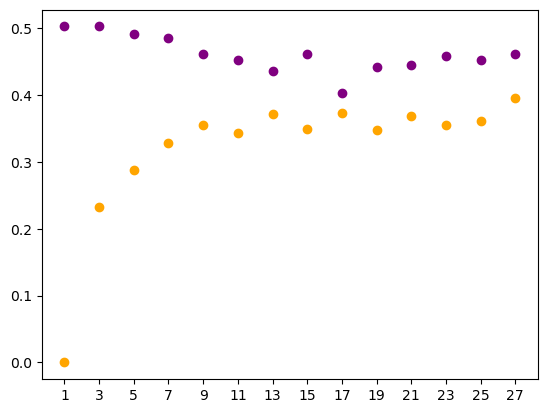

Best value of k is 17


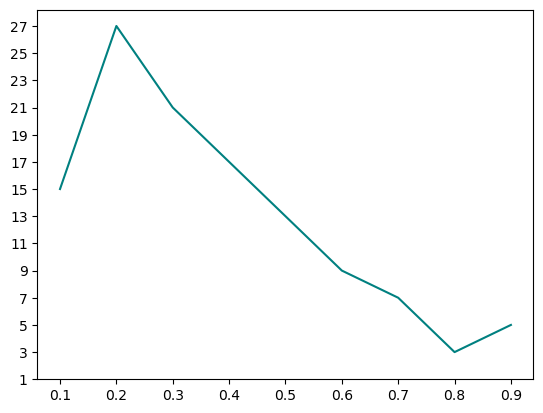

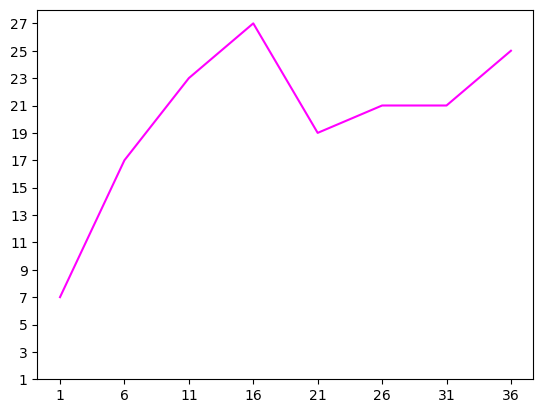


0.6416666666666667


In [4]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,numrep,rho,X_train, Y_train,size):
  #Iterate through range of k values
    #Iterate through number of repetations
      #Hold out rho fraction of training data in each repetition.
  avg_error_train = []
  avg_error_valid = []
  for k in range(1, k_range, 2):
    err_train = []
    err_valid = []
    n_validation = int((rho*size)//1)
    for r in range(numrep):
        index = np.arange(size).tolist()
        temp = np.random.choice(size,size = n_validation, replace = False)
        temp2 = [item for item in index if item not in temp]
        xv_valid = X_train[temp]
        yv_valid = Y_train[temp]
        xv_train = X_train[temp2]
        yv_train = Y_train[temp2]
        yv_pred_train  = kNNClassify(xv_train,yv_train,xv_train,k)
        yv_pred_valid  = kNNClassify(xv_train,yv_train,xv_valid,k)
        err_train += [1.0-KNNAccuracy(yv_train.tolist(),yv_pred_train)] 
        err_valid += [1.0-KNNAccuracy(yv_valid.tolist(),yv_pred_valid)] 
    
    avg_error_train += [sum(err_train)/numrep]
    avg_error_valid += [sum(err_valid)/numrep]
  
#   print(avg_error_train)  
#   print(avg_error_valid)  
  #Return errors on training and validation data
  return avg_error_train, avg_error_valid

k_range = 29
nrep = 10
rho = 0.3
error_train, error_valid = holdoutCVkNN(k_range, nrep, rho, x_train, y_train,120)
# print(error_train)  
# print(error_valid)  
k_values = list(range(1, k_range, 2))
#Plot training and validation errors for different values of k

plt.scatter(k_values, error_train, color ='orange',label = 'Training error')
plt.scatter(k_values, error_valid, color ='purple',label = 'Validation error')
plt.xticks(k_values)
plt.xlabel("Value of K", fontsize = 12)
plt.ylabel("error", fontsize = 12)
plt.legend()

plt.show()

#what is the best value for k?

min_error_index = error_valid.index(min(error_valid))
best_k = k_values[min_error_index]
print("Best value of k is " + str(best_k))

#Effect of rho and number repetations on k

rho_values = np.arange(start = 0.1,stop = 1.0,step = 0.1)
best_k_values_rho = []
for v in rho_values:
    err_train_r, err_valid_r = holdoutCVkNN(k_range, 10, v, x_train, y_train,120)
    best_k_values_rho += [k_values[err_valid_r.index(min(err_valid_r))]]
    
plt.plot(rho_values,best_k_values_rho,color ='teal')
plt.xticks(rho_values)
plt.yticks(k_values)
plt.ylabel("Value of K", fontsize = 12)
plt.xlabel("Rho", fontsize = 12)
plt.show()

best_k_values_nrep = []
nrep_values = np.arange(start = 1,stop = 40,step = 5)
for v in nrep_values:
    err_train_p, err_valid_p = holdoutCVkNN(k_range, v, 0.2, x_train, y_train,120)
    best_k_values_nrep += [k_values[err_valid_p.index(min(err_valid_p))]]
    
plt.plot(nrep_values,best_k_values_nrep,color ='magenta')
plt.xticks(nrep_values)
plt.yticks(k_values)
plt.ylabel("Value of K", fontsize = 12)
plt.xlabel("Number of repetitions", fontsize = 12)
plt.show()
#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).

#best_k is the best k (using rho = 0.3 and numrep = 10)
best_predictions_y_test = kNNClassify(x_train,y_train,x_test,best_k)
print("The accuracy using the best k in %")
print(KNNAccuracy(y_test.tolist(), best_predictions_y_test)*100)



## Observation and Inferences - part(c)
1. **what is the best value for k?** - we choose the k with lowest validation error while implementing the hold out function in the cross validation. Choosing very high k or very low k may lead to underfit or overfit model respectively.
2. **Effect of rho on value of k** - It is obseved that as rho increase the value of k decreases indicating inverse relations between them.
3. **Effect of numrep on value of k** - A zig-zag patterned graph is observed indicating no clear relation between them. 
4.  **What does a large number of repetitions provide?** - A large number of repetetions provide a more stable solution and there will be very less fluctuations in the value of best_k.

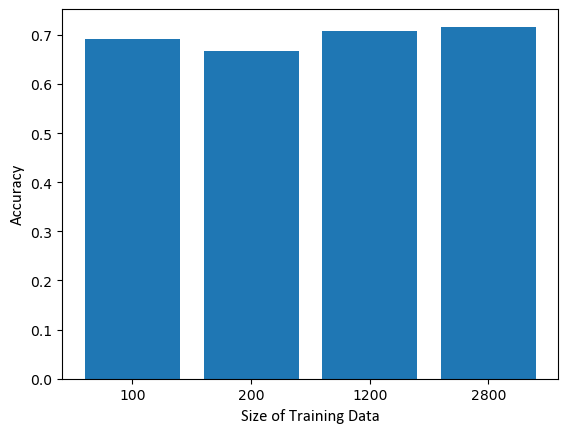

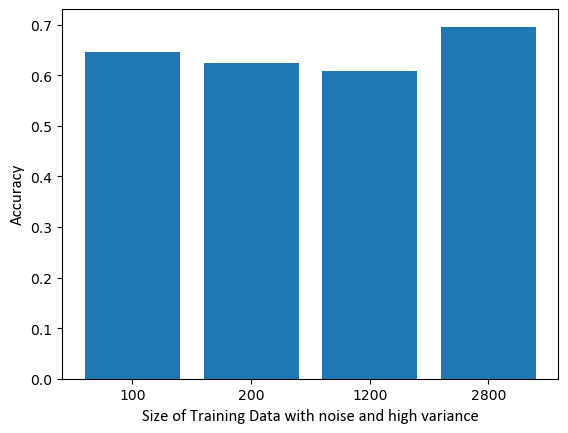

In [5]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases
import math


n = [100,200,1200,2800]
performance_n = []
for flag in n:
    sqrt_n = math.isqrt(flag)
    n_k_values = [x for x in range(sqrt_n - 10, sqrt_n + 11) if x % 2 != 0]
    i = flag//4
    n_train_points1 = np.random.multivariate_normal(mean1,cov,i)
    n_train_points2 = np.random.multivariate_normal(mean2,cov,i)
    n_train_points3 = np.random.multivariate_normal(mean3,cov,i)
    n_train_points4 = np.random.multivariate_normal(mean4,cov,i)
    nx_train_1 = np.concatenate((n_train_points1,n_train_points4))
    nx_train_2 = np.concatenate((n_train_points2,n_train_points3))
    ny_train_1 = np.ones(2*i,)
    ny_list_2_train = [-1]*(2*i)
    ny_train_2 = np.array(ny_list_2_train)

    nx_train = np.concatenate((nx_train_1,nx_train_2))
    ny_train = np.concatenate((ny_train_1,ny_train_2))

    n_error_train, n_error_valid = holdoutCVkNN(k_range,nrep,rho,nx_train, ny_train, 4*i)
    best_k_n = k_values[n_error_valid.index(min(n_error_valid))]
    n_predictions_y_test = kNNClassify(nx_train,ny_train,x_test,best_k_n)
    acc_n = KNNAccuracy(y_test.tolist(), n_predictions_y_test)
    performance_n += [acc_n]
    
plt.bar(list(map(str, n)), performance_n)
plt.xlabel("Size of Training Data", fontsize = 12)
plt.ylabel("Accuracy", fontsize = 12)
plt.xticks(list(map(str, n)))
plt.show()
# performance_n

#Experiments with more difficult data set.

cov_n=np.array([[0.6,0],[0,0.6]])
performance_nn = []
for length in n:
    i = length//4
    sqrt_n = math.isqrt(length)
    nn_k_values = [x for x in range(sqrt_n - 10, sqrt_n + 11) if x % 2 != 0]
    n_train_points1 = np.random.multivariate_normal(mean1,cov_n,i)
    n_train_points2 = np.random.multivariate_normal(mean2,cov_n,i)
    n_train_points3 = np.random.multivariate_normal(mean3,cov_n,i)
    n_train_points4 = np.random.multivariate_normal(mean4,cov_n,i)
    nx_train_1 = np.concatenate((n_train_points1,n_train_points4))
    nx_train_2 = np.concatenate((n_train_points2,n_train_points3))
    ny_train_1 = np.ones(2*i,)
    ny_list_2_train = [-1]*(2*i)
    ny_train_2 = np.array(ny_list_2_train)

    nx_train = np.concatenate((nx_train_1,nx_train_2))
    ny_train = np.concatenate((ny_train_1,ny_train_2))
    noise_indices = [1,2,5,6,77,81,44,23,42,38]  
    ny_train[noise_indices] = ny_train[noise_indices]*(-1)          # adding noise on an some indices
    n_error_train, n_error_valid = holdoutCVkNN(k_range,nrep,rho,nx_train, ny_train, 4*i)
    best_k_n = nn_k_values[n_error_valid.index(min(n_error_valid))]
    n_predictions_y_test = kNNClassify(nx_train,ny_train,x_test,best_k_n)
    acc_n = KNNAccuracy(y_test.tolist(), n_predictions_y_test)
    performance_nn += [acc_n] 
    
plt.bar(list(map(str, n)), performance_nn)
plt.xlabel("Size of Training Data with noise and high variance", fontsize = 12)
plt.ylabel("Accuracy", fontsize = 12)
plt.xticks(list(map(str, n)))
plt.show()




## Observation and Inferences part (d)
1. As the size of the training data increases the accuracy increases nullyfying the affects of noise and higher variance.

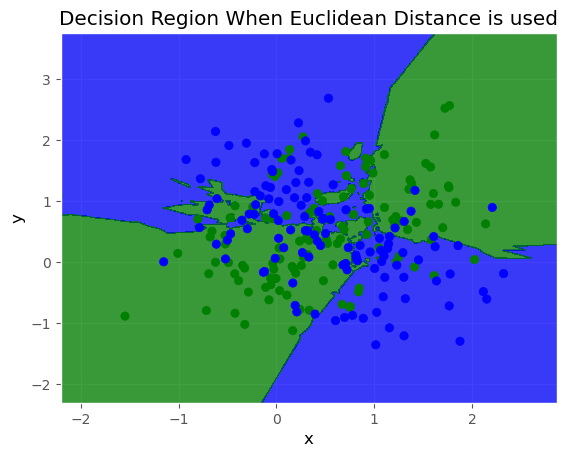

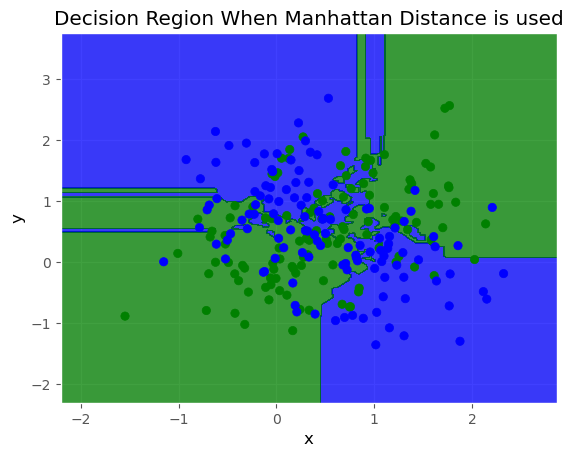

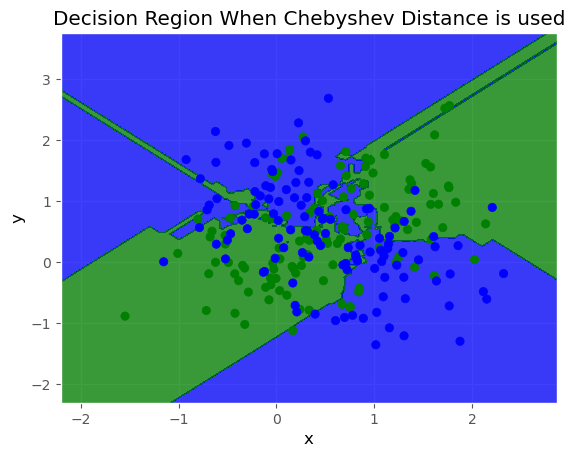

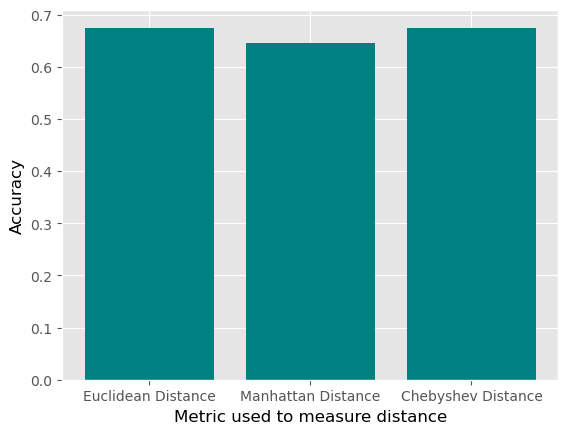

In [32]:
##################################
#Part(e): Influence of distance measure on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance measures
def kNNClassify_metric(X_train,Y_train,X_test,k, metric):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''
  predictions = []
  for x in X_test:
    if(metric=='Manhattan Distance'):
        distances = [np.sum(np.abs((x - x_tr))) for x_tr in X_train]
    elif(metric=='Euclidean Distance'):
        distances = [np.sqrt(np.sum((x - x_tr)**2)) for x_tr in X_train]
    elif(metric=='Chebyshev Distance'):
        distances = [np.max(np.abs((x - x_tr)**2)) for x_tr in X_train]

    kNN_indeces = np.argsort(distances)[0:k]
    kNN_y = np.array(Y_train[kNN_indeces])
#     print(np.count_nonzero(kNN_y== 1))
#     print(kNN_y)
    if(np.count_nonzero(kNN_y==1) > np.count_nonzero(kNN_y== -1)):
        predictions += [1]
    else:
        predictions += [-1]
#   print(predictions)
  return predictions


metrics = ['Euclidean Distance', 'Manhattan Distance', 'Chebyshev Distance']
acc_metric = []

# acc_metric = []
# for metric in metrics: 
#     pred = kNNClassify_metric(x_train,x_train,x_test,k, metric)
    
# plt.style.use('ggplot')
# plt.bar(metrics, acc_metric, color = 'teal')
# plt.xlabel("Metric used to measure distance", fontsize = 12)
# plt.ylabel("Accuracy", fontsize = 12)
# plt.xticks(metrics)
#Understand the decision regions of KNN classifier with different distance measures

for metric in metrics:
    x_grid = np.arange(start=x_train[:, 0].min() - 1, stop=x_train[:, 0].max() + 1, step=0.01)
    y_grid = np.arange(start=x_train[:, 1].min() - 1, stop=x_train[:, 1].max() + 1, step=0.01)

    XX, YY = np.meshgrid(x_grid, y_grid)
    i = np.c_[XX.ravel(), YY.ravel()]  
    pred_i = kNNClassify_metric(x_train, y_train, i, k, metric)
    predictions_i = np.array(pred_i)
    plt.title("Decision Region When " + metric + " is used")
    plt.contourf(XX, YY, predictions_i.reshape(XX.shape), colors=['blue', 'green'], alpha=0.75)
    c_test = ['green' if y == 1 else 'blue' for y in y_test]
    plt.scatter(x_test[:, 0], x_test[:, 1], color=c_test)
    plt.xlabel("x", fontsize = 12)
    plt.ylabel("y", fontsize = 12)
    plt.show()
    
    pred = kNNClassify_metric(x_train,y_train,x_test,k, metric)
    acc_metric += [KNNAccuracy(y_test.tolist(),pred)]
fig, ax = plt.subplots()
plt.style.use('ggplot')
plt.bar(metrics, acc_metric, color = 'teal')
plt.xlabel("Metric used to measure distance", fontsize = 12)
plt.ylabel("Accuracy", fontsize = 12)
plt.xticks(metrics)
plt.show()



## Observation and Inferences - part (e)
1. The accuracy of Euclidian distance proves to be better
2. The choice of decision region changes the decision regions
3. Adjust the distance metric considering the dataset's characteristics, highlighting the balance between responsiveness to the dataset's structure and resilience to noise.

In [56]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
# plt.subplot(211)
# plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
# plt.subplot(212)
# plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

#Create train, validation and test splits
images = images[:10000]        #checking for 10000 points to reduce computation time
targets = targets[:10000]

n_total = len(images)
n_train =  int(n_total*0.8)
n_validation = int(n_total*0.1)
n_test = int(n_total*0.1)

x_images_train = images[:n_train]
x_images_valid = images[n_train:n_train+n_validation]
x_images_test = images[n_train+n_validation:]
y_targets_train = targets[:n_train]
y_targets_valid = targets[n_train:n_train+n_validation]
y_targets_test = targets[n_train+n_validation:]

# y_targets_train.shape

#Write 'MultiClassKNNClassify' function

def MultiClassKNNClassify(X_train,Y_train,X_test,k, metric):
  predictions = []
  for x in X_test:
    distances = []
    if(metric=='Manhattan Distance'):
        distances = [np.sum(np.abs((x - x_tr))) for x_tr in X_train]
    elif(metric=='Euclidean Distance'):
        distances = [np.sqrt(np.sum((x - x_tr)**2)) for x_tr in X_train]
    elif(metric=='Chebyshev Distance'):
        distances = [np.max(np.abs((x - x_tr)**2)) for x_tr in X_train]
#     print(len(distances))
#     print(x)
    kNN_indeces = np.argsort(distances)[0:k]
    kNN_y = np.array(Y_train[kNN_indeces])
#     print(np.count_nonzero(kNN_y== 1))
#     print(kNN_y)
    predictions += [max(set(kNN_y), key = kNN_y.tolist().count)]
#   print(predictions)
  return predictions


#Empirically chose most suitable k and error function based on the evauation on cross-validation data
#Evaluate the performance using different values of 'k' on the validation data and select the optimal 'k' for the test data.

'''
error function = (Misclassifications/Total Predictions) is the most intuittive error function when it comes to classification because
it gives clear understanding of performance. Altough error functions like Cross-entropy loss is widely used 
and has proven to be effective in training classification models, it wasn't implemennted here as external libraries were required
to be used.
'''
mnist_k_values = [50,100,150,300]
error_y_pred_valid = []
for k_mnist in mnist_k_values:
    y_pred_valid = MultiClassKNNClassify(x_images_train,y_targets_train,x_images_valid,k_mnist, 'Euclidean Distance')
    error_y_pred_valid += [1-KNNAccuracy(y_targets_valid.tolist(), y_pred_valid)]
mnist_min_error_index = error_y_pred_valid.index(min(error_y_pred_valid))
mnist_best_k = mnist_k_values[mnist_min_error_index]
print(f"best value of k is {mnist_best_k} where the error function used is (Misclassifications/Total Predictions)")

#Evaluation the performance using different distance measures (l1,l2, etc) on the validation data and select the optimal distance measure for test data.
metrics = ['Euclidean Distance', 'Manhattan Distance', 'Chebyshev Distance']
acc_metric = []
for metric in metrics:
    pred = MultiClassKNNClassify(x_images_train,y_targets_train,x_images_valid,mnist_best_k, metric)
    acc_metric += [KNNAccuracy(y_targets_valid.tolist(),pred)]
mnist_max_acc_metric_index = acc_metric.index(max(acc_metric))
mnist_best_metric = metrics[mnist_max_acc_metric_index]
print("best metric for measuring distances is" + mnist_best_metric)

#Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation

mnist_best_pred = MultiClassKNNClassify(x_images_train,y_targets_train,x_images_test,mnist_best_k, mnist_best_metric)
mnist_accuracy = KNNAccuracy(y_targets_test.tolist(),mnist_best_pred)*100
print(f"The accuracy for the MNIST Data is in {mnist_accuracy}%")
# print()
#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    '''
    Inputs: Ground truth labels and classifier predictions
    Outputs: Confusion matrix
    '''
    mnist_confusion_matrix = np.zeros((10, 10), dtype=int)
    for i in range(len(true)):
        mnist_confusion_matrix[int(true[i])][int(pred[i])] += 1

    return mnist_confusion_matrix
print("The confusion matrix is")
print(compute_confusion_matrix(y_targets_test.tolist(), mnist_best_pred))
#Suggest an alternative ways to improve 
#A strategy for performance improvement involves scaling pixel values between 0 and 1. This adjustment enhances convergence and overall model performance
#Enhancing performance can also be achieved by employing the average of entire row values. This reduces the computational load from 784 calculations per image per comparison to just 28, significantly boosting efficiency.

C:\Users\mayan\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


best value of k is 50 where the error function used is (Misclassifications/Total Predictions)
best metric for measuring distances isEuclidean Distance
The accuracy for the MNIST Data is in 89.7%
The confusion matrix is
[[108   0   0   0   0   1   1   0   0   0]
 [  0 104   0   0   0   0   0   0   0   0]
 [  3   9  83   1   2   0   0   1   2   1]
 [  0   0   0 100   0   2   1   3   1   3]
 [  0   3   0   0  67   0   2   1   0   8]
 [  2   1   0   3   1  77   3   0   0   2]
 [  0   2   0   0   1   0 103   0   0   0]
 [  0   4   0   0   2   0   0 102   0   1]
 [  0  10   2   3   8   2   2   1  70   0]
 [  0   0   2   1   1   0   1   2   1  83]]


<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution-
    75% on previous executions
2. Write down the best accuracy on MNIST validation and test data.
    89.7%
3. Report your observations on the confusion matrix of KNN classifier on MNIST test data
    The diaginals are highere showing that accuracy is good.
    The accuray can be calculated as [Tr(Confusion Matrix)/Total pictures]
4.